# Teste Técnico : Cientista de Dados 
## Ives Santos 




## Objetivo:
    
1. Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?
2. É possível identificar algum padrão nas compras? Seja por época do ano ou por tipo de órgão comprador? 
3. O que mais é possível descobrir sobre as licitações do estado?

## Dados: 
    Dados relativos às licitações de todos os órgãos jurisdicionados, realizadas nos anos de 2016 à 2019
    Arquivos:
    licitacao.csv
    item.csv
    
    


## Bibliotecas:

    
    

In [1]:
import pandas as pd
import seaborn as sns 
import missingno as msno 
import numpy as np 

import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter("ignore")

<div style= color:#636363;"><h2>Estilo e Formatação:</h2> 

In [2]:
cores_7 = ["#f4f1de","#e07a5f","#3d405b","#81b29a","#f2cc8f"]
cores_8 = ["#335c67","#fff3b0","#e09f3e","#9e2a2b","#540b0e"]
cores_9 = ["#386641","#6a994e","#a7c957","#f2e8cf","#bc4749"]
cores_10= ["#d9ed92","#b5e48c","#99d98c","#76c893","#52b69a","#34a0a4","#168aad","#1a759f","#1e6091","#184e77"]
cores_11 =["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]


In [3]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=1.2)
    plt.tick_params(axis='both', labelsize=0, length = 0)
   # plt.title(custom_colors)

## LICITAÇÃO 

### IMPORTANDO DADOS:

In [5]:
#2016
licitacao_2016 = pd.read_csv("/home/ives/Desktop/Teste_tecnico_DSB/licitacao_2016.csv")
#2017
licitacao_2017 = pd.read_csv("/home/ives/Desktop/Teste_tecnico_DSB/licitacao_2017.csv")
#2018
licitacao_2018 = pd.read_csv("/home/ives/Desktop/Teste_tecnico_DSB/licitacao_2018.csv")
#2019
licitacao_2019 = pd.read_csv("/home/ives/Desktop/Teste_tecnico_DSB/licitacao_2019.csv")

### UNINDO OS DADOS EM UM ÚNICO DATAFRAME:

In [6]:
licitacao = licitacao_2016.append(licitacao_2017, ignore_index=True)
licitacao = licitacao.append(licitacao_2018, ignore_index=True)
licitacao = licitacao.append(licitacao_2019, ignore_index = True)


In [7]:
licitacao

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,84100,PM DE ESPERANÇA DO SUL,1.0,2016,CNV,12.0,2016.0,P,001,2016.0,...,NaN,NaN,J,6233397000148.0,6420.0,S,NaN,NaN,NaN,N
1,84100,PM DE ESPERANÇA DO SUL,4.0,2016,CNV,12.0,2016.0,P,003,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
2,82701,CM DE XANGRI-LÁ,1.0,2016,PRP,12.0,2016.0,G,01,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
3,84100,PM DE ESPERANÇA DO SUL,6.0,2016,CNV,12.0,2016.0,P,005,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
4,63900,PM DE COTIPORÃ,36.0,2016,PRD,NaN,NaN,NaN,344,2016.0,...,J,9255424000171.0,NaN,NaN,NaN,S,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237006,58706,INST. APOS. PENSÕES SERV. MUN. - SÃO LEOPOLDO,24.0,2019,PRD,NaN,NaN,NaN,3429,2019.0,...,J,360305000104.0,NaN,NaN,NaN,S,NaN,NaN,NaN,N
237007,56900,PM DE SANTA MARIA,39.0,2019,PRI,NaN,NaN,NaN,214,2019.0,...,J,2191788000196.0,NaN,NaN,NaN,S,NaN,NaN,NaN,N
237008,58701,CM DE SÃO LEOPOLDO,2.0,2019,PRI,NaN,NaN,NaN,02,2019.0,...,J,125392000115.0,NaN,NaN,NaN,S,NaN,NaN,NaN,N
237009,88029,PM DE CORONEL PILAR,28.0,2019,PRP,44.0,2019.0,P,824,2019.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N


In [8]:
licitacao.columns


Index(['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO',
       'CD_TIPO_MODALIDADE', 'NR_COMISSAO', 'ANO_COMISSAO', 'TP_COMISSAO',
       'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL',
       'TP_LICITACAO', 'TP_NIVEL_JULGAMENTO', 'DT_AUTORIZACAO_ADESAO',
       'TP_CARACTERISTICA_OBJETO', 'TP_NATUREZA', 'TP_REGIME_EXECUCAO',
       'BL_PERMITE_SUBCONTRATACAO', 'TP_BENEFICIO_MICRO_EPP',
       'TP_FORNECIMENTO', 'TP_ATUACAO_REGISTRO', 'NR_LICITACAO_ORIGINAL',
       'ANO_LICITACAO_ORIGINAL', 'NR_ATA_REGISTRO_PRECO',
       'DT_ATA_REGISTRO_PRECO', 'PC_TAXA_RISCO', 'TP_EXECUCAO', 'TP_DISPUTA',
       'TP_PREQUALIFICACAO', 'BL_INVERSAO_FASES', 'TP_RESULTADO_GLOBAL',
       'CNPJ_ORGAO_GERENCIADOR', 'NM_ORGAO_GERENCIADOR', 'DS_OBJETO',
       'CD_TIPO_FUNDAMENTACAO', 'NR_ARTIGO', 'DS_INCISO', 'DS_LEI',
       'DT_INICIO_INSCR_CRED', 'DT_FIM_INSCR_CRED', 'DT_INICIO_VIGEN_CRED',
       'DT_FIM_VIGEN_CRED', 'VL_LICITACAO', 'BL_ORCAMENTO_SIGILOSO',
       'BL_RECEBE

In [9]:
licitacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237011 entries, 0 to 237010
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CD_ORGAO                     237011 non-null  int64  
 1   NM_ORGAO                     237011 non-null  object 
 2   NR_LICITACAO                 237011 non-null  float64
 3   ANO_LICITACAO                237011 non-null  int64  
 4   CD_TIPO_MODALIDADE           237011 non-null  object 
 5   NR_COMISSAO                  153245 non-null  float64
 6   ANO_COMISSAO                 153245 non-null  float64
 7   TP_COMISSAO                  153245 non-null  object 
 8   NR_PROCESSO                  236858 non-null  object 
 9   ANO_PROCESSO                 236857 non-null  float64
 10  TP_OBJETO                    237011 non-null  object 
 11  CD_TIPO_FASE_ATUAL           237011 non-null  object 
 12  TP_LICITACAO                 237011 non-null  object 
 13 

### FILTRANDO OS DADOS:


#### ESCOLHENDO APENAS OS DADOS COM RELEVÂNCIA PRA ESSE ESTUDO:

In [10]:
licitacao = licitacao[["NR_LICITACAO","ANO_LICITACAO","CD_TIPO_MODALIDADE","DS_OBJETO", "TP_OBJETO", "TP_NATUREZA","DT_HOMOLOGACAO"  ]]

#### FITRANDO OS DADOS PARA O OBJETO COMPRAS (DS_OBJETO = COM)

In [11]:
licitacao = licitacao[licitacao['TP_OBJETO']=='COM']


In [12]:
licitacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82405 entries, 1 to 237010
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NR_LICITACAO        82405 non-null  float64
 1   ANO_LICITACAO       82405 non-null  int64  
 2   CD_TIPO_MODALIDADE  82405 non-null  object 
 3   DS_OBJETO           82405 non-null  object 
 4   TP_OBJETO           82405 non-null  object 
 5   TP_NATUREZA         82405 non-null  object 
 6   DT_HOMOLOGACAO      60399 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.0+ MB


#### Valores nulos

In [13]:
licitacao.isnull().sum()



NR_LICITACAO              0
ANO_LICITACAO             0
CD_TIPO_MODALIDADE        0
DS_OBJETO                 0
TP_OBJETO                 0
TP_NATUREZA               0
DT_HOMOLOGACAO        22006
dtype: int64

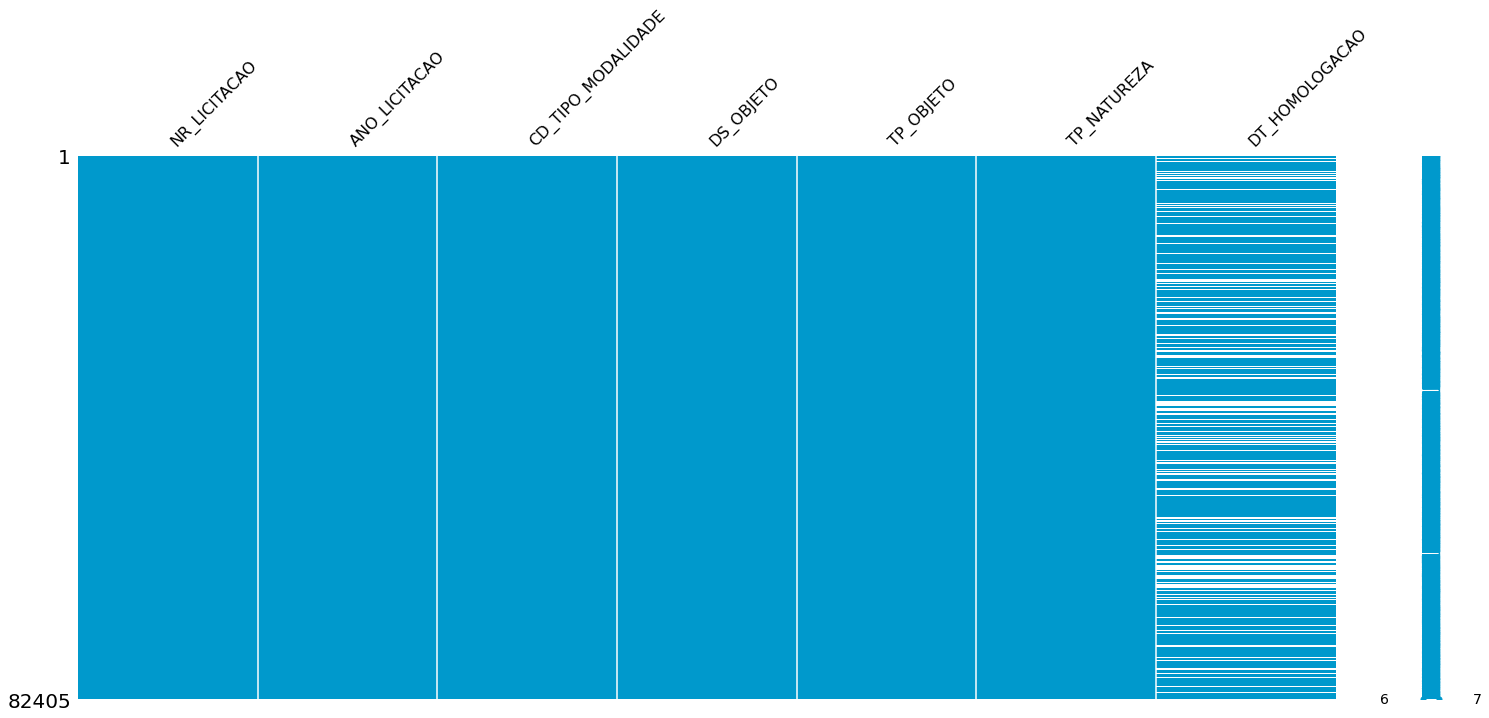

In [14]:
fig = msno.matrix(licitacao, color=(0,0.6,0.8))



## Comentário:
    Como não vamos aplicar nenhum modelo de Classificação ou Regressão nesse estudo, resolvi manter os 
    valores nulos na tabela a princípio.
* Como os dados nulos aparecem somente na coluna DT_HOMOLOGACAO  esse tratamento será feito apenas quando esses dados forem ser utilizados
    
    



<div style= color:#636363;"><h2>TRATAMENTO INICIAL DOS DADOS:</h2> 

#### NORMALIZAR OS DADOS CATEGÓRICOS DA COLUNA DS_OBJETO:

In [15]:
licitacao['DS_OBJETO'] = licitacao["DS_OBJETO"].str.lower()
licitacao['DS_OBJETO'] = licitacao['DS_OBJETO'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
licitacao['DS_OBJETO']= licitacao['DS_OBJETO'].str.lstrip('\"')

#### FORMATAR OS DADOS DA COLUNA DT_HOMOLOGAÇÃO:

In [16]:
licitacao['DT_HOMOLOGACAO'] = pd.to_datetime(licitacao['DT_HOMOLOGACAO'],format='%Y/%m/%d')

#### CRIANDO UMA COLUNA COM A PRIMEIRA PALABRA DO OBJETO:





    A priemeira palavra dos registros da coluna TP_OBJETO é o suficiente para identificar o objeto em questão.
    


In [17]:
licitacao['objeto']= licitacao["DS_OBJETO"].str.split(" ", n=1, expand=False)
licitacao['objeto']= licitacao["DS_OBJETO"].str.split(" ", n=1, expand=True)
licitacao['objeto']

1            aquisicao
2            aquisicao
3            aquisicao
5            aquisicao
6            aquisicao
              ...     
237002       aquisicao
237003       aquisicao
237005         100.000
237007    fornecimento
237010       aquisicao
Name: objeto, Length: 82405, dtype: object

#### CRIANDO UMA COLUNA COM AS TRES PRIMEIRAS PALABRAS DO OBJETO:


In [18]:
new = licitacao['DS_OBJETO'].str.split(" ", n=3, expand=True)
new['primeiro'] = new[0]
new['segundo']=new[1]
new['terce']=new[2]
new["objeto_3"] = new['primeiro'] + ' ' +new['segundo'] + ' ' + new['terce']


##### NORMALIZANDO PALAVRAS:

In [19]:
new['objeto_3'] = new['objeto_3'].str.replace('materiais','material')
new['objeto_3'] = new['objeto_3'].str.replace('.',' ')

licitacao['objeto'] = licitacao['objeto'].str.replace('compras','aquisicao')

In [20]:
licitacao['objeto_3'] = new['objeto_3']

#### CRIANDO UMA COLUNA COM O MÊS DA HOMOLOGACAO:

In [21]:
licitacao['mes'] = pd.DatetimeIndex(licitacao['DT_HOMOLOGACAO']).month

#### CRIANDO UMA COLUNA COM O TRIMESTRE DA HOMOLOGAÇÃO:

In [22]:
licitacao['trimestre'] = licitacao['DT_HOMOLOGACAO'].dt.quarter
licitacao

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,DS_OBJETO,TP_OBJETO,TP_NATUREZA,DT_HOMOLOGACAO,objeto,objeto_3,mes,trimestre
1,4.00,2016,CNV,aquisicao de merenda escolar,COM,N,2016-01-29,aquisicao,aquisicao de merenda,1.0,1.0
2,1.00,2016,PRP,aquisicao de protocoladora e fragmentadora de ...,COM,N,2016-02-01,aquisicao,aquisicao de protocoladora,2.0,1.0
3,6.00,2016,CNV,aquisicao de materiais de limpeza para as dive...,COM,N,2016-02-11,aquisicao,aquisicao de material,2.0,1.0
5,3.00,2016,PRP,aquisicao de tubos de concreto,COM,R,2016-02-15,aquisicao,aquisicao de tubos,2.0,1.0
6,3.00,2016,PRP,aquisicao de tubos de concreto,COM,N,2016-01-28,aquisicao,aquisicao de tubos,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
237002,29.00,2019,PRD,aquisicao de materiais de limpeza,COM,N,NaT,aquisicao,aquisicao de material,NaN,NaN
237003,28.00,2019,PRD,aquisicao de materiais de limpeza para esta ca...,COM,N,NaT,aquisicao,aquisicao de material,NaN,NaN
237005,84509.55,2019,PRI,100.000 (cem mil) unidades municoes cbc 40sw c...,COM,N,NaT,100.000,100 000 (cem mil),NaN,NaN
237007,39.00,2019,PRI,fornecimento de passagem escolar urbana,COM,N,NaT,fornecimento,fornecimento de passagem,NaN,NaN


In [23]:
licitacao['objeto_3'].value_counts()

aquisicao de material             9057
registro de precos                6259
aquisicao de generos              4002
contratacao de empresa            2896
aquisicao de equipamentos         2539
                                  ... 
equipamentos para radiografia,       1
aquisicao de caixas,                 1
aquisicao futuras de                 1
manutencao e conserto                1
aquisicao uma ambulancia             1
Name: objeto_3, Length: 10188, dtype: int64

<div style= color:#636363;"><h2> VISUALIZAÇÃO GRÁFICA DOS DADOS:</h2> 

##  MODALIDADE

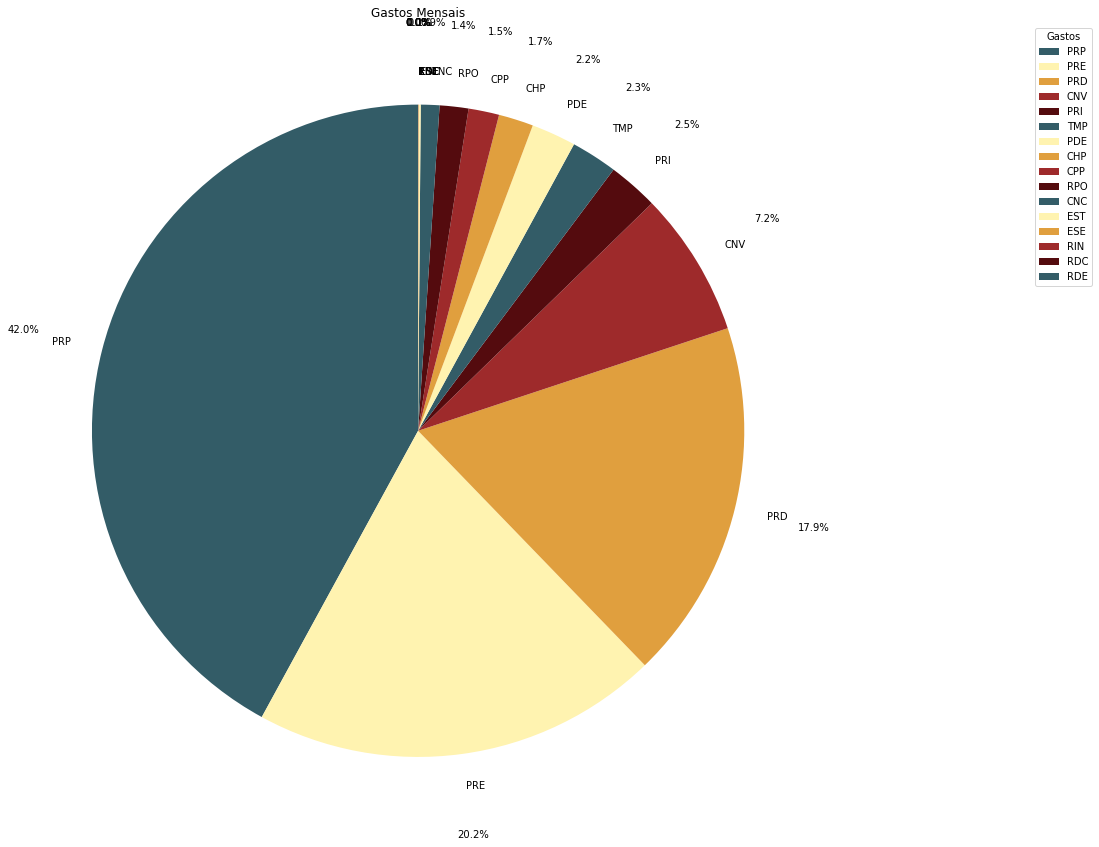

In [24]:
conmo = licitacao['CD_TIPO_MODALIDADE'].value_counts()
labels = licitacao['CD_TIPO_MODALIDADE'].value_counts().index




fig1 , ax1 = plt.subplots(figsize = (15 ,15))
ax1.pie(conmo  ,labels = labels,explode=None,autopct='%0.1f%%', pctdistance=1.25, shadow=None, startangle=90, colors= cores_8)
ax1.legend(labels, title="Gastos", loc="upper left",bbox_to_anchor=(1.25, 0, 0.5, 1))
ax1.set_title("Gastos Mensais")
plt.show()
ax1.legend()
plt.show()




## Análise:
    
    Dos dados analisados entre os anos de 2016-2019, se observa que 62,2% das licitações ocorridas nesse período se deram através da modalidade de Pregão, sendo composto por 42,0% da modalidade de Pregão Presencial (PRP) e 20,2% do Pregão Eletrônico (PRE).
    O Pregão é uma modalidade de licitação passível de utilização para a aquisição de bens e serviços comuns, qualquer que seja o valor da contrataçã.
    
    
    



## OBJETO

#### Contagem Objetos:

In [25]:
objeto = licitacao['objeto'].value_counts()
objeto

aquisicao       48944
registro         7642
contratacao      4304
fornecimento     1415
material         1348
                ...  
objetivo            1
valore              1
margarina           1
passagem            1
bombona             1
Name: objeto, Length: 1640, dtype: int64

In [26]:
total = licitacao['objeto'].value_counts().sum()


In [27]:
objeto_porcen = pd.DataFrame(data = objeto * 100/total, index = objeto.index)

In [28]:
objeto_porcen

,objeto
aquisicao,59.394454
registro,9.273709
contratacao,5.222984
fornecimento,1.717129
material,1.635823
...,...
objetivo,0.001214
valore,0.001214
margarina,0.001214
passagem,0.001214


### Agrupando os menores valores < 1 % 

* Devido a não padronização de preenchimento dos dados, optei pelo agrupamento dos objetos < 1 % 
* Um tratamento de dados mais detalhado é necessário



## Agrupando os menores valores < 1 %¶
Devido a não padronização de preenchimento dos dados, optei pelo agrupamento dos objetos < 1 %.
    
Um tratamento de dados mais detalhado é necessário
   A priemeira palavra dos registros da coluna TP_OBJETO é o suficiente para identificar o objeto em questão.
    
    


In [29]:
outros = objeto_porcen.query('objeto < 1').sum()

outros = outros.to_frame()
outros= pd.DataFrame(outros).transpose()
outros= pd.DataFrame(outros, columns=["objeto"])
outros = outros.rename(index ={0:"Outros"})
objeto_filtrado = objeto_porcen.query("objeto >1")
objeto_filtrado = objeto_filtrado.append(outros)



In [30]:
outros

,objeto
Outros,20.359202


In [31]:
objeto_filtrado

,objeto
aquisicao,59.394454
registro,9.273709
contratacao,5.222984
fornecimento,1.717129
material,1.635823
compra,1.353073
a,1.043626
Outros,20.359202


In [32]:
label = objeto_filtrado.index
label

Index(['aquisicao', 'registro', 'contratacao', 'fornecimento', 'material',
       'compra', 'a', 'Outros'],
      dtype='object')

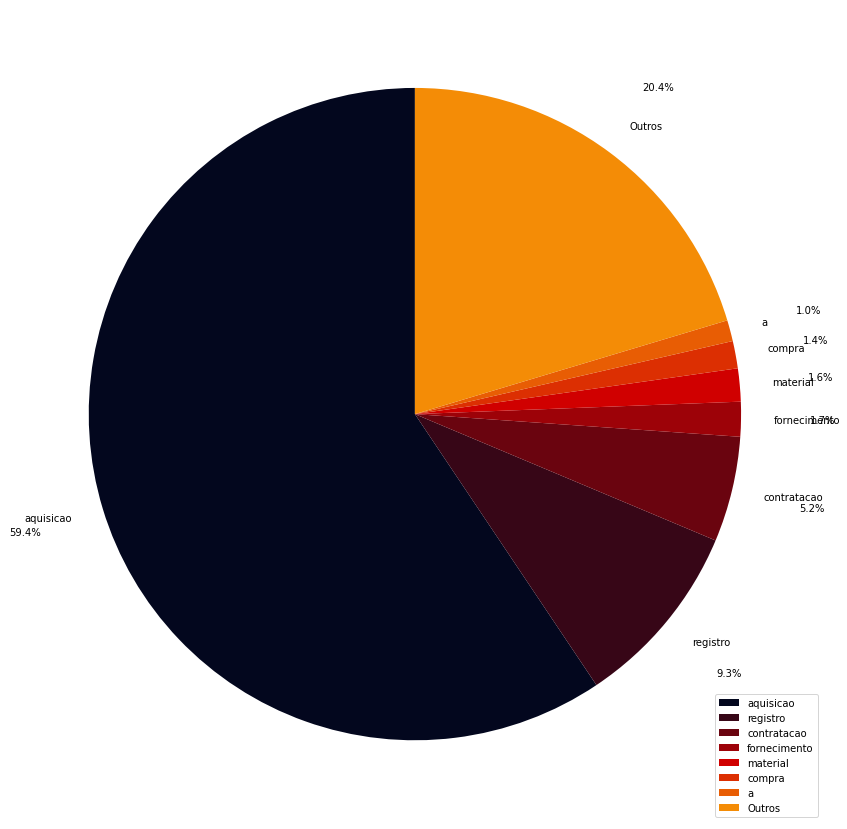

In [33]:
fig3 , ax3 = plt.subplots(figsize = (15 ,15))

ax3.pie(objeto_filtrado['objeto'],labels = label,explode=None,autopct='%0.1f%%', pctdistance=1.25, shadow=None, startangle=90, colors= cores_11)
ax3.legend(label, title="Gastos", loc="upper left",bbox_to_anchor=(1.25, 0, 0.5, 1))
#ax1.set_title("Gastos Mensais")

ax3.legend()
plt.show()

### OBJETO POR TRIMESTRE CADA ANO:

In [34]:
lici_2016 = licitacao.query('ANO_LICITACAO == 2016')
lici_2017 = licitacao.query('ANO_LICITACAO == 2017')
lici_2018 = licitacao.query('ANO_LICITACAO == 2018')
lici_2019 = licitacao.query('ANO_LICITACAO == 2019')


In [35]:
triano = licitacao[['objeto','ANO_LICITACAO','trimestre','mes']]

In [36]:
triano = triano.dropna()

In [37]:
triano['ANO_LICITACAO'] = triano['ANO_LICITACAO'].astype(str)

In [38]:
triano['mes'] = triano['mes'].astype(str)

In [39]:
triano['trimestre'] = triano['trimestre'].astype(str)

In [40]:
triano['data'] = triano[['ANO_LICITACAO','trimestre','mes']].agg('.'.join, axis=1)

In [41]:
triano = triano.groupby(['data']).count()

In [42]:
triano

,objeto,ANO_LICITACAO,trimestre,mes
data,,,,
2016.1.0.1.0,370,370,370,370
2016.1.0.2.0,204,204,204,204
2016.1.0.3.0,193,193,193,193
2016.2.0.4.0,189,189,189,189
2016.2.0.5.0,1126,1126,1126,1126
2016.2.0.6.0,1249,1249,1249,1249
2016.3.0.7.0,1270,1270,1270,1270
2016.3.0.8.0,1364,1364,1364,1364
2016.3.0.9.0,1056,1056,1056,1056


In [43]:
x = triano.index
x = pd.DataFrame(x)

In [44]:
x

,data
0,2016.1.0.1.0
1,2016.1.0.2.0
2,2016.1.0.3.0
3,2016.2.0.4.0
4,2016.2.0.5.0
5,2016.2.0.6.0
6,2016.3.0.7.0
7,2016.3.0.8.0
8,2016.3.0.9.0
9,2016.4.0.10.0


In [45]:
xs = x.index

In [46]:
xs = pd.DataFrame(xs)

In [47]:
xs

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


### EVOLUÇÃO DA QUANTIDADE DE LICITAÇÕES DE 2016 A 2019 :

In [48]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='data', ylabel='objeto'>

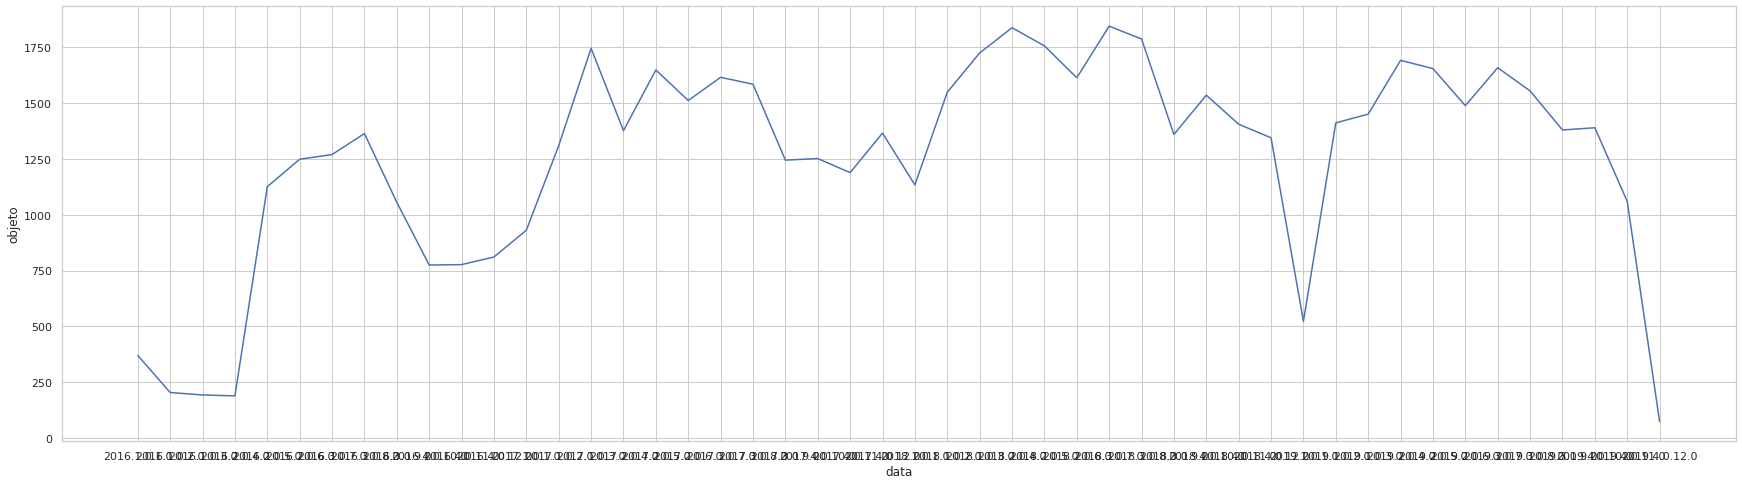

In [49]:
plt.figure(figsize=(30,8))

sns.lineplot(x="data", y="objeto", markers=True,
        
             data=triano)

In [50]:
#triano = licitacao['objeto'].value_counts().groupby(licitacao['trimestre'])

In [51]:
triano.dtypes

objeto           int64
ANO_LICITACAO    int64
trimestre        int64
mes              int64
dtype: object

In [54]:
#index = str(licitacao['ANO_LICITACAO']) + "." + str(licitacao['trimestre'])

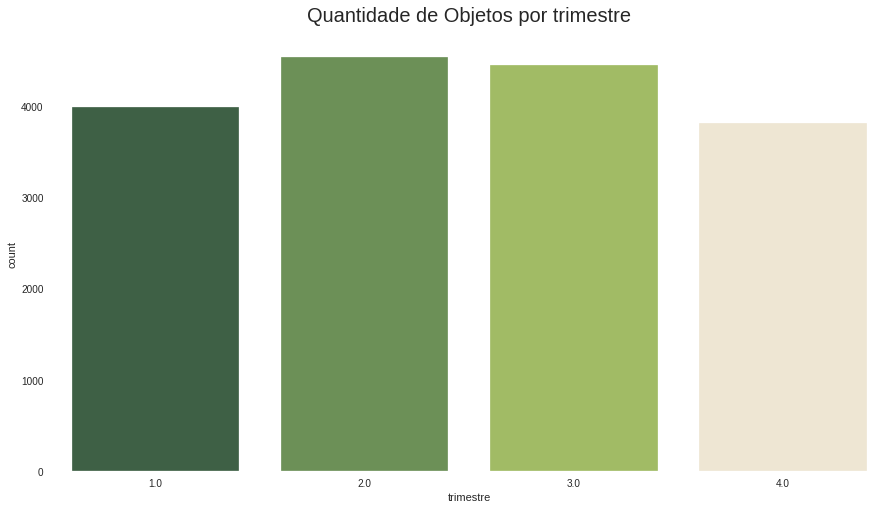

In [55]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
ax2 = plt.axes()

ax2.set_facecolor("white")

plt.title("Quantidade de Objetos por trimestre", fontsize=20, y=1.02)
ax2 = sns.countplot(x = lici_2017['trimestre'] ,palette=cores_9 )

### OBJETO POR TRIMESTRE TOTAL:

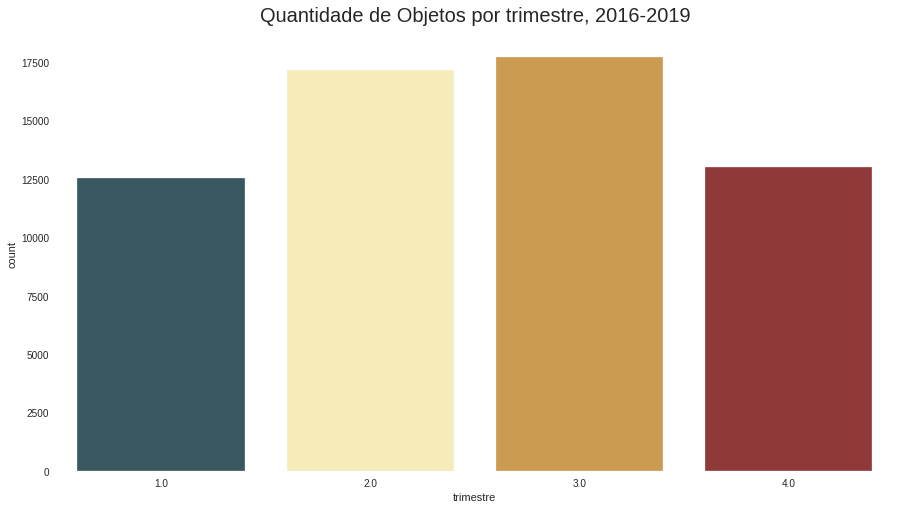

In [56]:

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_facecolor("white")
plt.title("Quantidade de Objetos por trimestre, 2016-2019", fontsize=20, y=1.02)
sns.countplot(x = licitacao['trimestre'] ,palette=cores_8)
plt.show()

### OBJETO POR ANO: 

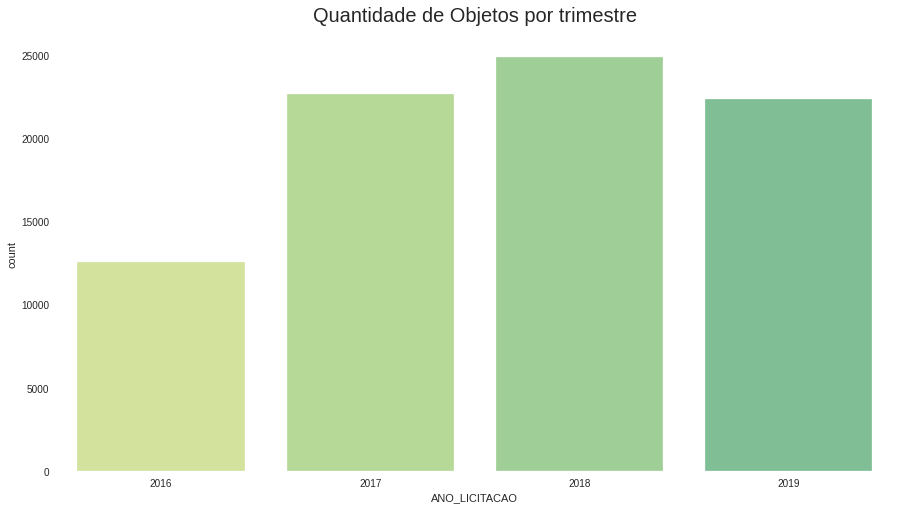

In [60]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))


ax = plt.axes()
ax.set_facecolor("white")
plt.title("Quantidade de Objetos por trimestre", fontsize=20, y=1.02)
sns.countplot(x = licitacao['ANO_LICITACAO'] ,palette=cores_10)
plt.show()

## ITEM

In [61]:
# IMPORTANDO DADOS :
# 2016
item_2016 = pd.read_csv("/home/ives/Desktop/Teste_tecnico_DSB/item_2016.csv")
# 2017
item_2017 = pd.read_csv("/home/ives/Desktop/Teste_tecnico_DSB/item_2017.csv")
# 2018
item_2018 = pd.read_csv("/home/ives/Desktop/Teste_tecnico_DSB/item_2018.csv")
# 2019
item_2019 = pd.read_csv("/home/ives/Desktop/Teste_tecnico_DSB/item_2019.csv")




In [62]:
item = item_2016.append(item_2017, ignore_index=True)
item = item.append(item_2018, ignore_index=True)
item = item.append(item_2019, ignore_index = True)

In [63]:
item = item[["NR_LICITACAO","ANO_LICITACAO","CD_TIPO_MODALIDADE","NR_LOTE","NR_ITEM","DS_ITEM","VL_UNITARIO_HOMOLOGADO","VL_TOTAL_HOMOLOGADO"]]

## TRATAMENTO INICIAL DOS DADOS:

In [64]:
# NORMALIZAR OS DADOS CATEGÓRICOS DA COLUNA DS_ITEM:

In [65]:
item['DS_ITEM'] = item['DS_ITEM'].str.lower()
item['DS_ITEM'] = item['DS_ITEM'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [66]:
# CRIANDO UMA COLUNA COM A PRIMEIRA PALAVRA DO ITEM 

In [67]:
item['item'] = item['DS_ITEM'].str.split(" ", n=1, expand=False) 
item['item'] = item['DS_ITEM'].str.split(" ", n=1, expand=True) 

In [68]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200756 entries, 0 to 3200755
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NR_LICITACAO            float64
 1   ANO_LICITACAO           int64  
 2   CD_TIPO_MODALIDADE      object 
 3   NR_LOTE                 int64  
 4   NR_ITEM                 int64  
 5   DS_ITEM                 object 
 6   VL_UNITARIO_HOMOLOGADO  float64
 7   VL_TOTAL_HOMOLOGADO     object 
 8   item                    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 219.8+ MB


In [69]:
#a coluna VL_TOTAL_HOMOLOGADO possui agum resgistros preenchidos com ############ , errrors='coerce' oage valores inválidos para Nan

In [70]:
item['VL_TOTAL_HOMOLOGADO'] =pd.to_numeric(item['VL_TOTAL_HOMOLOGADO'], errors='coerce')

In [71]:
item

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,DS_ITEM,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,item
0,15.0,2016,PRP,1,2,"pneu 1000/20 liso radial, dianteiro, 16 lonas,...",1430.0,14300.0,pneu
1,15.0,2016,PRP,1,4,"pneu 12.4x24 garra baixa, 10 lonas",1258.0,5032.0,pneu
2,15.0,2016,PRP,1,7,pneu 1400x24 minimo 12 lonas,1998.0,11988.0,pneu
3,15.0,2016,PRP,1,8,"pneu 17.5x25 12 lonas, capacidade minima de ca...",2978.0,11912.0,pneu
4,15.0,2016,PRP,1,12,"pneu 18.4x30 garra baixa, minimo 10 lonas",2500.0,10000.0,pneu
...,...,...,...,...,...,...,...,...,...
3200751,2.0,2019,PRE,1,13,pneu 195/60r15 88v s/c,230.0,920.0,pneu
3200752,2.0,2019,PRE,1,14,pneu 185/70r14 88t s/c,220.0,880.0,pneu
3200753,2.0,2019,PRE,1,15,pneu 7.50-16 10 lonas p/ implemento (grade),398.0,796.0,pneu
3200754,2.0,2019,PRE,1,17,pneu 6.00-16 / 6 lonas implemento agricola,280.0,560.0,pneu


In [72]:
item_cont = item['item'].value_counts()

In [73]:
type(item_cont)

pandas.core.series.Series

In [74]:
total = item['item'].value_counts().sum()

In [75]:
item_porcen = pd.DataFrame(data = item_cont * 100/total, index = item_cont.index)

In [76]:
item_porcen

,item
servico,1.287603
filtro,1.190063
pneu,1.169318
contratacao,1.158352
papel,1.134858
...,...
beterraba\tboa,0.000031
2852,0.000031
n007603020103,0.000031
pincel.,0.000031


In [77]:
item_filtrado = pd.DataFrame(data=item_cont, index = item_cont.index)

In [78]:
item_filtrado

,item
servico,41213
filtro,38091
pneu,37427
contratacao,37076
papel,36324
...,...
beterraba\tboa,1
2852,1
n007603020103,1
pincel.,1


In [79]:
item_filtrado = item_filtrado.query("item >=30000")
item_filtrado

,item
servico,41213
filtro,38091
pneu,37427
contratacao,37076
papel,36324


In [80]:
outros

,objeto
Outros,20.359202


In [81]:
item_filtrado

,item
servico,41213
filtro,38091
pneu,37427
contratacao,37076
papel,36324


### ITENS NOS 4 ANOS 

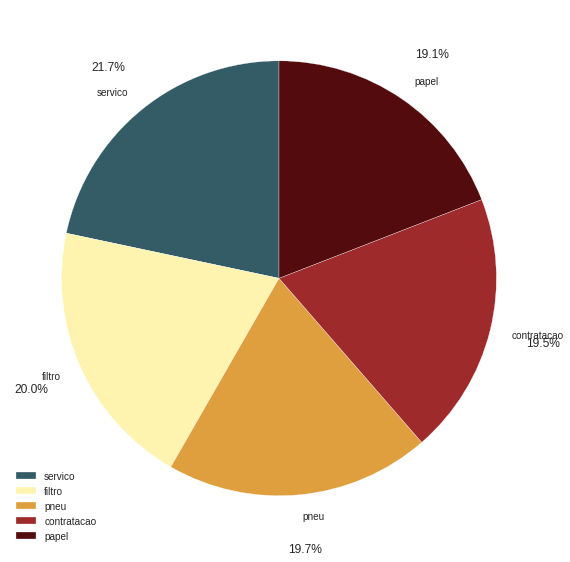

In [82]:
fig4 , ax4 = plt.subplots(figsize = (15 ,10))
label = item_filtrado.index
ax4.pie(item_filtrado['item'],labels = label,explode=None,autopct='%0.1f%%', pctdistance=1.25, shadow=None, startangle=90, colors= cores_8)
ax4.legend(label, title="Gastos", loc="upper left",bbox_to_anchor=(1.25, 0, 0.5, 1))
#ax1.set_title("Gastos Mensais")
ax4.legend()
plt.show()





## Análise:
    
    Por essa análise inicial, observa-se que o intem mais licitado no período (2016-2019), foi a contrataçãon de serviço,
    
    Dos itens referentes ao Objeto da Licitação COMPRAS, o item pneu, filtro e papel foram os mais comprados, pelos órgãos do Estado do Rio Grande do Sul.
    Vale ressaltar que essa contagem foi feita em cima das quantidades de itens. 
    
    
    




### ITEM POR ANO 

In [83]:
item_2016 = item.query('ANO_LICITACAO == 2016')
item_2017 = item.query('ANO_LICITACAO == 2017')
item_2018 = item.query('ANO_LICITACAO == 2018')
item_2019 = item.query('ANO_LICITACAO == 2019')

In [84]:
item_2016

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,DS_ITEM,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,item
0,15.0,2016,PRP,1,2,"pneu 1000/20 liso radial, dianteiro, 16 lonas,...",1430.000,14300.0,pneu
1,15.0,2016,PRP,1,4,"pneu 12.4x24 garra baixa, 10 lonas",1258.000,5032.0,pneu
2,15.0,2016,PRP,1,7,pneu 1400x24 minimo 12 lonas,1998.000,11988.0,pneu
3,15.0,2016,PRP,1,8,"pneu 17.5x25 12 lonas, capacidade minima de ca...",2978.000,11912.0,pneu
4,15.0,2016,PRP,1,12,"pneu 18.4x30 garra baixa, minimo 10 lonas",2500.000,10000.0,pneu
...,...,...,...,...,...,...,...,...,...
456363,13.0,2016,PRP,1,154,ranitidina 150mg,0.089,890.0,ranitidina
456364,13.0,2016,PRP,1,156,salbutamol 100mcg/dose aerosol 200 doses,7.100,2130.0,salbutamol
456365,13.0,2016,PRP,1,158,sinvastatina 40mg,0.144,14400.0,sinvastatina
456366,13.0,2016,PRP,1,167,valproato de sodio 500 mg,0.620,9300.0,valproato


In [85]:
# 2016

item_fil_16 = item.query("ANO_LICITACAO == 2017")
item_fil_16 = item_fil_16['item'].value_counts()
item_fil_16 = item_fil_16.to_frame()
item_fil_16= item_fil_16.query("item > 10000")


# 2017
item_fil_17 = item.query("ANO_LICITACAO == 2017")
item_fil_17 = item_fil_17['item'].value_counts()
item_fil_17 = item_fil_17.to_frame()
item_fil_17= item_fil_17.query("item > 10000")

# 2018

item_fil_18 = item.query("ANO_LICITACAO == 2018")
#item_fil_16 = item.query("item[item].value_counts() >= 30000 & ANO_LICITACAO == 2016")
item_fil_18 = item_fil_18['item'].value_counts()
item_fil_18 = item_fil_18.to_frame()
item_fil_18= item_fil_18.query("item > 10000")

# 2019

item_fil_19 = item.query("ANO_LICITACAO == 2019")
#item_fil_16 = item.query("item[item].value_counts() >= 30000 & ANO_LICITACAO == 2016")
item_fil_19 = item_fil_19['item'].value_counts()
item_fil_19 = item_fil_19.to_frame()
item_fil_19= item_fil_19.query("item > 9500")


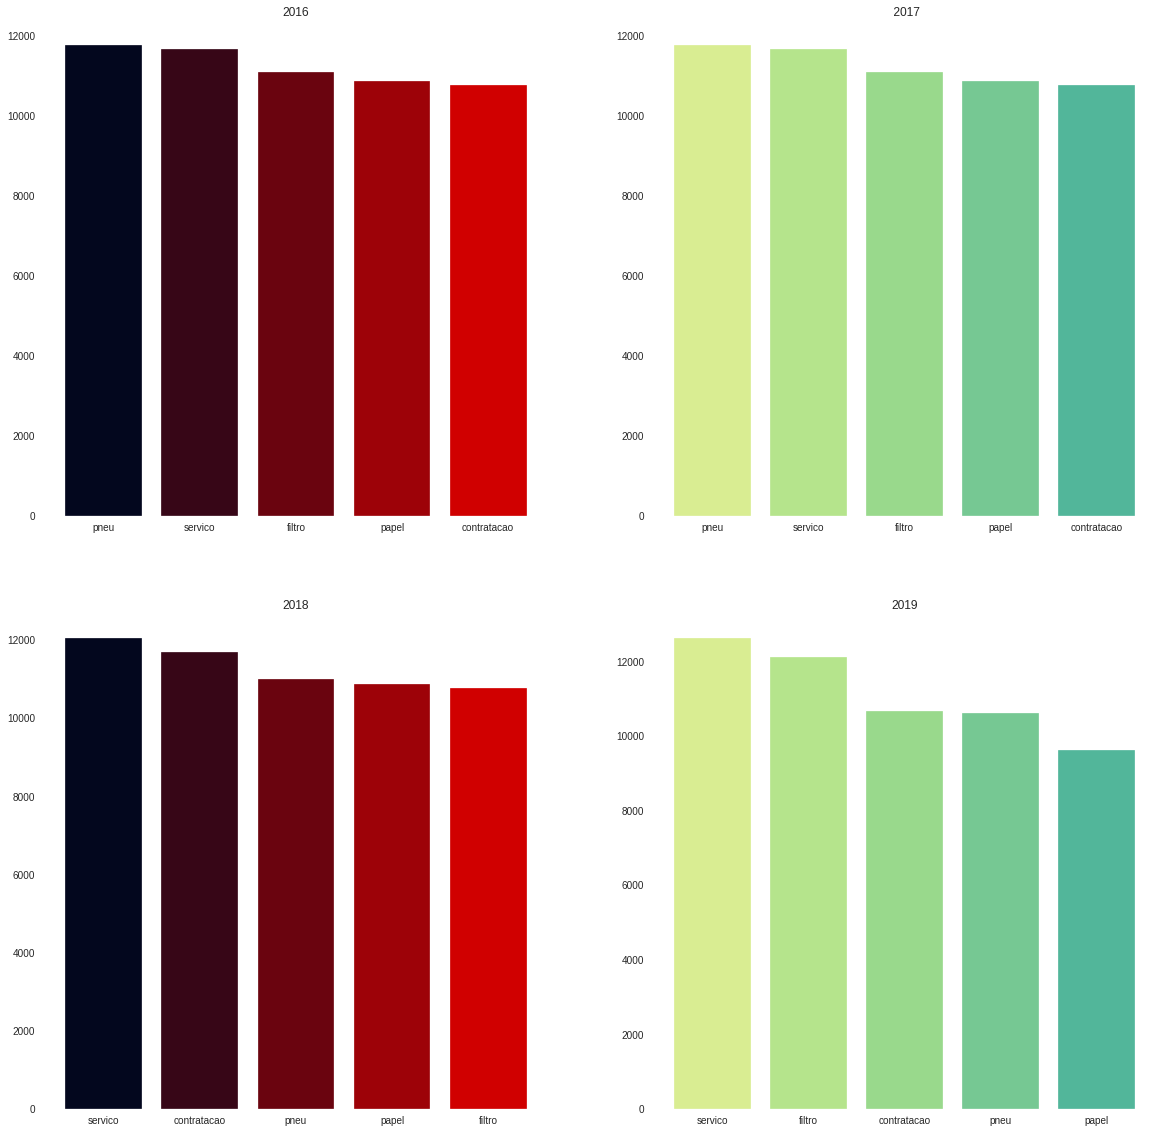

In [86]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))

axs[0, 0].bar(x = item_fil_16.index ,height=item_fil_16['item'],color = cores_11)
axs[0, 0].set_title('2016')
axs[0, 0].set_facecolor("white") 


axs[0, 1].bar(x = item_fil_17.index ,height=item_fil_17['item'], color = cores_10)
axs[0, 1].set_title(' 2017') 
axs[0, 1].set_facecolor("white")

axs[1, 0].bar(x = item_fil_18.index ,height=item_fil_18['item'], color= cores_11)
axs[1, 0].set_title('2018') 
axs[1, 0].set_facecolor("white")

axs[1, 1].bar(x = item_fil_19.index ,height=item_fil_19['item'], color=cores_10)
axs[1, 1].set_title('2019') 
axs[1, 1].set_facecolor("white")
plt.show()


### VALOR GASTO POR ANO 

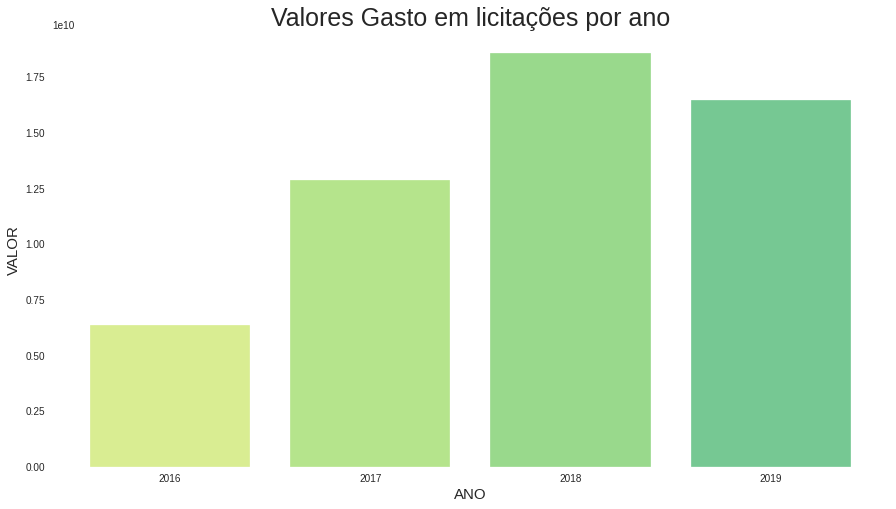

In [87]:
# data:
d = item.groupby(['ANO_LICITACAO']).sum()
# plot:
fig = plt.figure(figsize=(15,8), frameon=False)
ax = plt.axes()
plt.bar(x=d.index, height = d['VL_TOTAL_HOMOLOGADO'], color=cores_10)
# format:
plt.title("Valores Gasto em licitações por ano", fontsize=25)
plt.xlabel("ANO", fontsize=15)
plt.ylabel('VALOR', fontsize=15)
ax.set_facecolor("white")
plt.xticks(range(2016, 2020))
plt.show()

## ANÁLISES NÃO FINALIZADAS: 

1. TENTEI FAZER UM JOIN ENTRE AS DUAS TABELAS (licitacao e item) 
    * para isso tentei criar uma chave que identificasse os itens licitados com a licitação correspondente, porém minha observação inicial foi de que não foi feita a relação corretamente.
    Seria necessário uma melhor análise desses dados.

In [88]:
# CRIANDO A CHAVE NA TABELA Licitacao

licitacao_2016["NR_LICITACAO"] = licitacao_2016["NR_LICITACAO"].astype(str)
licitacao_2016["ANO_LICITACAO"] = licitacao_2016["ANO_LICITACAO"].astype(str)
licitacao_2016["chave"] = licitacao_2016[["NR_LICITACAO", "ANO_LICITACAO","CD_TIPO_MODALIDADE"]].agg('-'.join, axis=1)




In [ ]:
# CRIANDO A CHAVE NA TABELA item

item_2016["NR_LICITACAO"]=item_2016["NR_LICITACAO"].astype(float)
item_2016["ANO_LICITACAO"]=item_2016["ANO_LICITACAO"].astype(str)
item_2016["chave"] = item_2016[["NR_LICITACAO", "ANO_LICITACAO","CD_TIPO_MODALIDADE"]].agg('-'.join, axis=1)





In [ ]:
# TENTATIVA DE RELACIONAR AS DUAS TABELAS EM UM ÚNICO DATAFRAME:

df_2016 = pd.merge(licitacao_2016, item_2016, how="outer", on='chave')


#################################################################################################################

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@